## Discrete curvature of surfaces

[Gauss-Bonnet for discrete surfaces](https://math.uchicago.edu/~may/REU2015/REUPapers/Upadhyay.pdf)

In [1]:
import math
import numpy as np

def triangulate_surf(n, f, r=1):
    """
    Triangulates the surface defined by a function f(x, y) using n equidistant points.

    Args:
        n (int): The number of equidistant points to use.
        f (function): The function f(x, y) that defines the surface z = f(x, y).
        r (float, optional): The radius of the circle in the xy-plane to project points onto. Defaults to 1.

    Returns:
        list: A list of triangles, where each triangle is a list of three vertices.
              Two vertices are from the surface, and the third is (0, 0, 0).
    """
    if n < 3:
        return []  # Need at least 3 points to form triangles

    points_surf = []
    for i in range(n):
        angle = 2 * math.pi * i / n
        x = r * math.cos(angle)
        y = r * math.sin(angle)
        z = f(x, y)  # Use the provided function f(x, y)
        points_surf.append(np.array([x, y, z]))

    triangles = []
    origin = np.array([0, 0, 0])
    for i in range(n):
        p1 = points_surf[i]
        p2 = points_surf[(i + 1) % n]  # Wrap around to the first point for the last triangle
        triangles.append([origin, p1, p2])

    return triangles


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import numpy as np

def display_triangulation(triangles):
    """
    Displays a 3D wireframe plot of the given triangulation.

    Args:
        triangles (list): A list of triangles, where each triangle is a list of three vertices (lists or numpy arrays).
    """
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for triangle in triangles:
        v1, v2, v3 = triangle
        # Extract x, y, z coordinates for each vertex
        x = [v1[0], v2[0], v3[0], v1[0]]  # Close the triangle by repeating the first vertex
        y = [v1[1], v2[1], v3[1], v1[1]]
        z = [v1[2], v2[2], v3[2], v1[2]]

        # Plot the wireframe of each triangle
        ax.plot(x, y, z, color='black', linewidth=0.5) # Adjust linewidth for wireframe thickness

    # Set labels for the axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Wireframe Triangulation')

    # Equal aspect ratio for all axes to represent shape correctly
    ax.set_box_aspect([np.ptp([v[0] for triangle in triangles for v in triangle]),
                       np.ptp([v[1] for triangle in triangles for v in triangle]),
                       np.ptp([v[2] for triangle in triangles for v in triangle])])


    plt.show()

In [3]:
def get_angle(tri):
    origin = tri[0]
    x = tri[1] - origin
    y = tri[2] - origin
    x = x / np.linalg.norm(x)
    y = y 
    return np.arccos(x / np.linalg.norm(x) @ y / np.linalg.norm(y))


def get_defect(origin, triangles):
    """
    angle deffect from Gauss-Bonnet for discrete surfaces 5.2 
    """
    selected_triangles = [
        tri
        for tri in triangles
        if any(all(np.isclose(origin, v)) for v in tri )
    ]
    angles = [get_angle(tri) for tri in selected_triangles]
    return 2 * math.pi - sum(angles)

In [4]:
n_points = 128
radius = 1

Displaying triangulation with 128 points and radius 1:
Angle deffect of origin: -2.2364088113629634


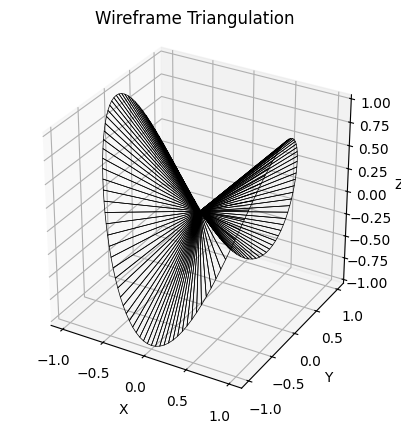

In [5]:
hyp_f = lambda x, y: x ** 2 - y ** 2

hyp_triangles_list = triangulate_surf(n_points, hyp_f, radius)

print(f"Displaying triangulation with {n_points} points and radius {radius}:")

print("Angle deffect of origin:", get_defect(np.zeros(3), hyp_triangles_list))
display_triangulation(hyp_triangles_list)

Displaying triangulation with 128 points and radius 1:
Angle deffect of origin: 1.8405254226088026


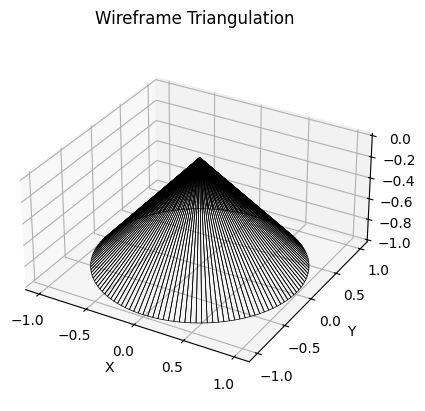

In [6]:
para_f = lambda x, y: (- x ** 2 - y ** 2)
para_triangles_list = triangulate_surf(n_points, para_f, radius)

print(f"Displaying triangulation with {n_points} points and radius {radius}:")
print("Angle deffect of origin:", get_defect(np.zeros(3), para_triangles_list))
display_triangulation(para_triangles_list)

In [7]:
def more_wavy_hyperbolic_f(x, y, w=0.75):
    angle = np.arctan2(y, x)
    return np.cos(angle * w * 2 * math.pi) * (x ** 2 + y ** 2)

Displaying triangulation with 128 points and radius 1:
Angle deffect of origin: -10.229739942100213


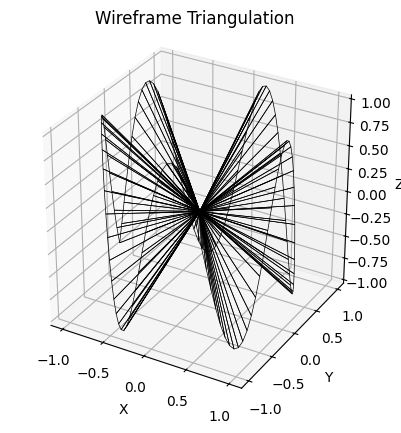

In [8]:
very_hyp_triangles_list = triangulate_surf(n_points, more_wavy_hyperbolic_f, radius)

print(f"Displaying triangulation with {n_points} points and radius {radius}:")
print("Angle deffect of origin:", get_defect(np.zeros(3), very_hyp_triangles_list))
display_triangulation(very_hyp_triangles_list)